In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [98]:
data = pd.read_csv("../../Data/S3_V113_VC1e-1_seed.dat");
data = data.iloc[50:]

In [99]:
properties_to_check = [
    "objective",
    "num_3_simplices",
    "deg_var_0_simplices",
    "deg_mean_1_simplices",
    "deg_var_1_simplices"
]

results = pd.DataFrame(columns=["property", "slope", "p-value"])
for property in properties_to_check:
    normalized_data = data[property] / np.mean(data[property])
    regress = linregress(data["total_moves_accepted"], normalized_data)
    results.loc[len(results)] = [property, regress.slope, regress.pvalue]

results

,property,slope,p-value
0,objective,-1.230680e-08,0.750092
1,num_3_simplices,1.728292e-11,0.987477
2,deg_var_0_simplices,2.750530e-09,0.826692
3,deg_mean_1_simplices,1.136853e-10,0.821064
4,deg_var_1_simplices,8.154186e-09,0.169666


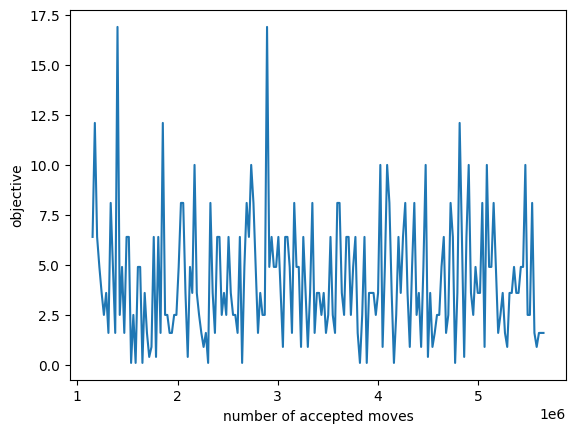

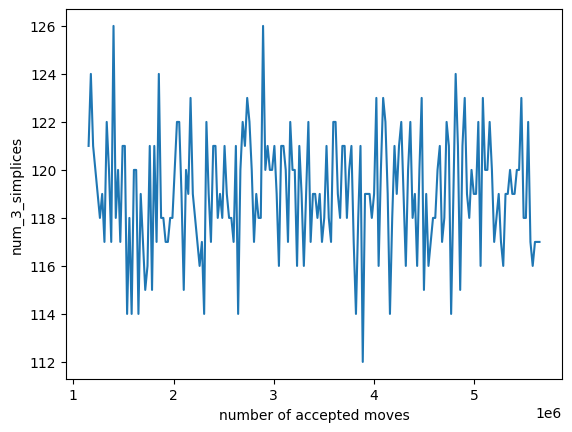

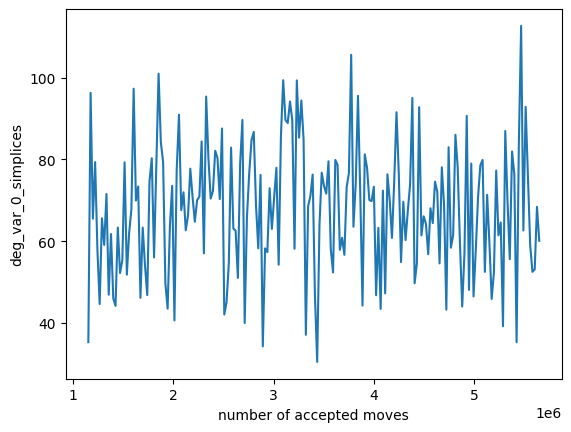

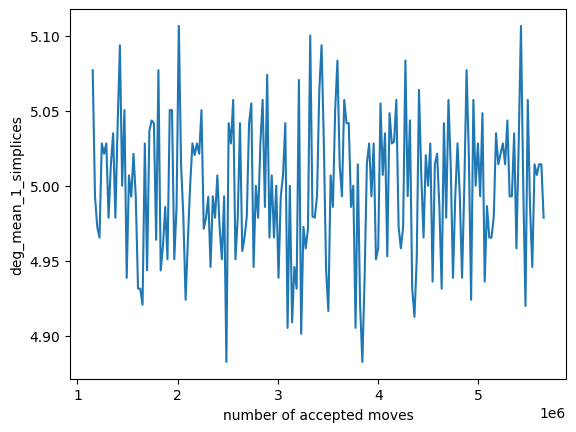

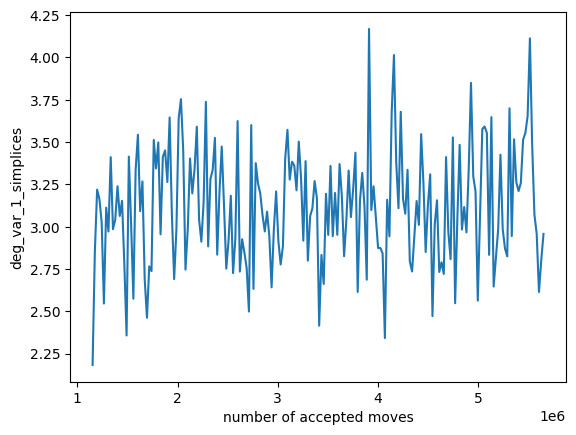

In [100]:
for property in properties_to_check:
    plt.plot(data["total_moves_accepted"], data[property]);
    plt.xlabel("number of accepted moves")
    plt.ylabel(property)
    plt.show()